# 통계 라이브러리

## 1. SciPy
* numpy 기반
* 과학 계산용


In [2]:
from scipy import stats

stats.norm.pdf(1) # 정규분포의 확률밀도함수(Probability Density Function, PDF)

0.24197072451914337

In [3]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df.describe() # 기술 통계

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
desc = stats.describe(df)
desc.mean

array([-1.19562108e+02,  3.56252247e+01,  2.85893529e+01,  2.64366441e+03,
        5.39410824e+02,  1.42957394e+03,  5.01221941e+02,  3.88357810e+00,
        2.07300912e+05])

In [5]:
# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(df['median_house_value'].sample(500))
shapiro_test.statistic

0.9092297215531029

In [6]:
shapiro_test.pvalue

1.0313034124768639e-16

In [7]:
# Ho(귀무가설): 평균 중간 주택 가격은 200,000이다.
# H1(대립가설): 평균 중간 주택 가격은 200,000이 아니다.
t_test_result = stats.ttest_1samp(df['median_house_value'].sample(500), 200000) # 단일 표본 t-검정
t_test_result.statistic

2.7727676515366886

In [8]:
t_test_result.pvalue

0.005766104881576235

In [9]:
from scipy.optimize import curve_fit
import numpy as np

def linear_model(x, a, b): # 선형 관계
  return a * x + b

x_data = df['median_income']
y_data = df['median_house_value']

params, covariance = curve_fit(linear_model, x_data, y_data)
params

array([42054.07477716, 43980.62862686])

In [12]:
from scipy.signal import convolve
import matplotlib.pyplot as plt

median_house_value = df['median_house_value']

# 이동 평균
window_size = 5
window = np.ones(window_size) / window_size
window

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [15]:
smoothed_signal = convolve(median_house_value, window, mode='valid')
smoothed_signal

array([74320., 75740., 76200., ..., 95360., 91180., 94880.])

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(median_house_value, label='Original Data')
plt.plot(smoothed_signal, label='Smoothed Data')

array([1., 1., 1., 1., 1.])

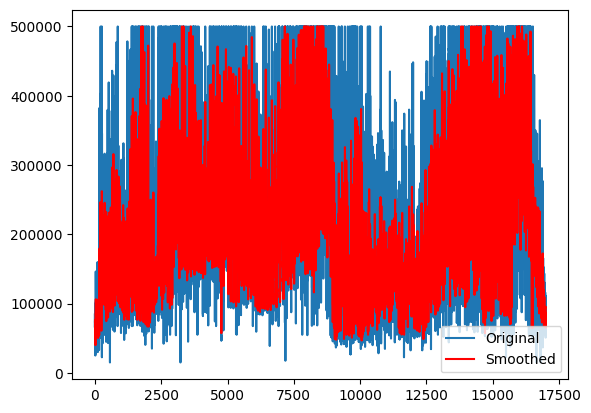

In [22]:
plt.plot(median_house_value.index, median_house_value, label='Original')
plt.plot(np.arange(window_size-1, len(median_house_value)), smoothed_signal, label='Smoothed', color='red')
plt.legend()
plt.show()

## 2. Statsmodels

In [23]:
import statsmodels.api as sm

housing_data = pd.read_csv('sample_data/california_housing_test.csv')

x = housing_data['median_income'] # 독립변수
y = housing_data['median_house_value'] # 종속변수

x = sm.add_constant(x)

# 선형회귀모델
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2478.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:59:11   Log-Likelihood:                -38261.
No. Observations:                3000   AIC:                         7.653e+04
Df Residuals:                    2998   BIC:                         7.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.962e+04   3490.668     14.216      0.000    4.28e+04    5.65e+04
median_income  4.103e+04    824.285     49.779      0.000    3.94e+04    4.26e+04
==============================================================================
Omnibus:                      618.746   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1273.306
Skew:                           1.207   Prob(JB):                    3.20e-277
Kurtosis:                       5.087   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
new_data = pd.DataFrame({'const': 1, 'median_income': [2.5, 4.5, 6.5]})
new_data

,const,median_income
0,1,2.5
1,1,4.5
2,1,6.5


In [25]:
predictions = model.predict(new_data)
predictions

,0
0,152205.776721
1,234270.574996
2,316335.373272
